<a href="https://colab.research.google.com/github/fralfaro/r4ds-book/blob/main/docs/15_factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factors

## Introduction

In R, factors are used to work with categorical variables, variables that have a fixed and known set of possible values. They are also useful when you want to display character vectors in a non-alphabetical order.

Historically, factors were much easier to work with than characters. As a result, many of the functions in base R automatically convert characters to factors. This means that factors often crop up in places where they're not actually helpful. Fortunately, you don't need to worry about that in the tidyverse, and can focus on situations where factors are genuinely useful.

Historically, factors were much easier to work with than characters. As a result, many of the functions in base R automatically convert characters to factors. This means that factors often crop up in places where they're not actually helpful. Fortunately, you don't need to worry about that in the tidyverse, and can focus on situations where factors are genuinely useful.


### Prerequisites

To work with factors, we'll use the __forcats__ package, which provides tools for dealing with **cat**egorical variables (and it's an anagram of factors!). It provides a wide range of helpers for working with factors. forcats is not part of the core tidyverse, so we need to load it explicitly.


In [1]:
library(tidyverse)
library(forcats)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()




## Creating factors

Imagine that you have a variable that records month:



In [2]:
x1 <- c("Dec", "Apr", "Jan", "Mar")


Using a string to record this variable has two problems:

1.  There are only twelve possible months, and there's nothing saving you
    from typos:


In [3]:
x2 <- c("Dec", "Apr", "Jam", "Mar")


2.  It doesn't sort in a useful way:


In [4]:
sort(x1)

[1] "Apr" "Dec" "Jan" "Mar"


You can fix both of these problems with a factor. To create a factor you must start by creating a list of the valid __levels__:



In [5]:
month_levels <- c(
  "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
)


Now you can create a factor:


In [6]:
y1 <- factor(x1, levels = month_levels)
y1
sort(y1)

[1] Dec Apr Jan Mar
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

[1] Jan Mar Apr Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec


And any values not in the set will be silently converted to NA:


In [7]:
y2 <- factor(x2, levels = month_levels)
y2

[1] Dec  Apr  <NA> Mar 
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec


If you want a warning, you can use `readr::parse_factor()`:


In [8]:
y2 <- parse_factor(x2, levels = month_levels)

Warning message:
“1 parsing failure.
row col           expected actual
  3  -- value in level set    Jam
”



If you omit the levels, they'll be taken from the data in alphabetical order:


In [9]:
factor(x1)

[1] Dec Apr Jan Mar
Levels: Apr Dec Jan Mar


Sometimes you'd prefer that the order of the levels match the order of the first appearance in the data. You can do that when creating the factor by setting levels to `unique(x)`, or after the fact, with `fct_inorder()`:


In [10]:
f1 <- factor(x1, levels = unique(x1))
f1

f2 <- x1 %>% factor() %>% fct_inorder()
f2

[1] Dec Apr Jan Mar
Levels: Dec Apr Jan Mar

[1] Dec Apr Jan Mar
Levels: Dec Apr Jan Mar


If you ever need to access the set of valid levels directly, you can do so with `levels()`:


In [11]:
levels(f2)

[1] "Dec" "Apr" "Jan" "Mar"


## General Social Survey

For the rest of this chapter, we're going to focus on `forcats::gss_cat`. It's a sample of data from the [General Social Survey](http://gss.norc.org), which is a long-running US survey conducted by the independent research organization NORC at the University of Chicago. The survey has thousands of questions, so in `gss_cat` I've selected a handful that will illustrate some common challenges you'll encounter when working with factors.



In [12]:
gss_cat

year,marital,age,race,rincome,partyid,relig,denom,tvhours
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2000,Never married,26,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12
2000,Divorced,48,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NA
2000,Widowed,67,White,Not applicable,Independent,Protestant,No denomination,2
2000,Never married,39,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4
2000,Divorced,25,White,Not applicable,Not str democrat,None,Not applicable,1
2000,Married,25,White,$20000 - 24999,Strong democrat,Protestant,Southern baptist,NA
2000,Never married,36,White,$25000 or more,Not str republican,Christian,Not applicable,3
2000,Divorced,44,White,$7000 to 7999,"Ind,near dem",Protestant,Lutheran-mo synod,NA
2000,Married,44,White,$25000 or more,Not str democrat,Protestant,Other,0



(Remember, since this dataset is provided by a package, you can get more information about the variables with `?gss_cat`.)

When factors are stored in a tibble, you can't see their levels so easily. One way to see them is with `count()`:


In [13]:
gss_cat %>%
  count(race)

race,n
<fct>,<int>
Other,1959
Black,3129
White,16395



Or with a bar chart:



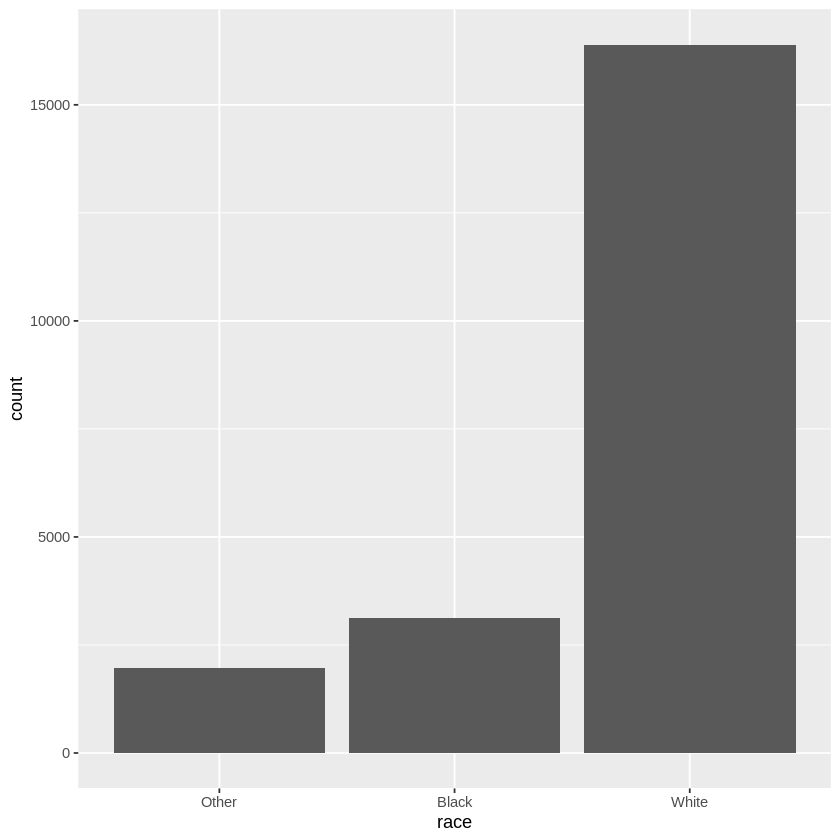

In [14]:
ggplot(gss_cat, aes(race)) +
  geom_bar()


By default, ggplot2 will drop levels that don't have any values. You can force them to display with:


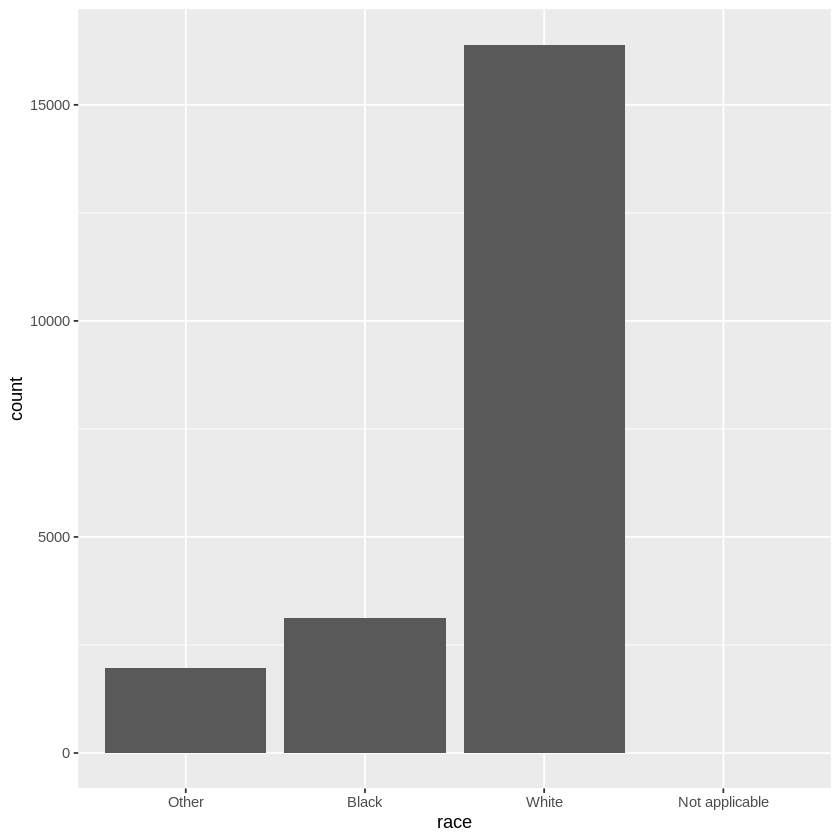

In [15]:
ggplot(gss_cat, aes(race)) +
  geom_bar() +
  scale_x_discrete(drop = FALSE)


These levels represent valid values that simply did not occur in this dataset. Unfortunately, dplyr doesn't yet have a `drop` option, but it will in the future.

When working with factors, the two most common operations are changing the order of the levels, and changing the values of the levels. Those operations are described in the sections below.

### Exercise

1.  Explore the distribution of `rincome` (reported income). What makes the
    default bar chart hard to understand? How could you improve the plot?

1.  What is the most common `relig` in this survey? What's the most
    common `partyid`?

1.  Which `relig` does `denom` (denomination) apply to? How can you find
    out with a table? How can you find out with a visualisation?

## Modifying factor order

It's often useful to change the order of the factor levels in a visualisation. For example, imagine you want to explore the average number of hours spent watching TV per day across religions:


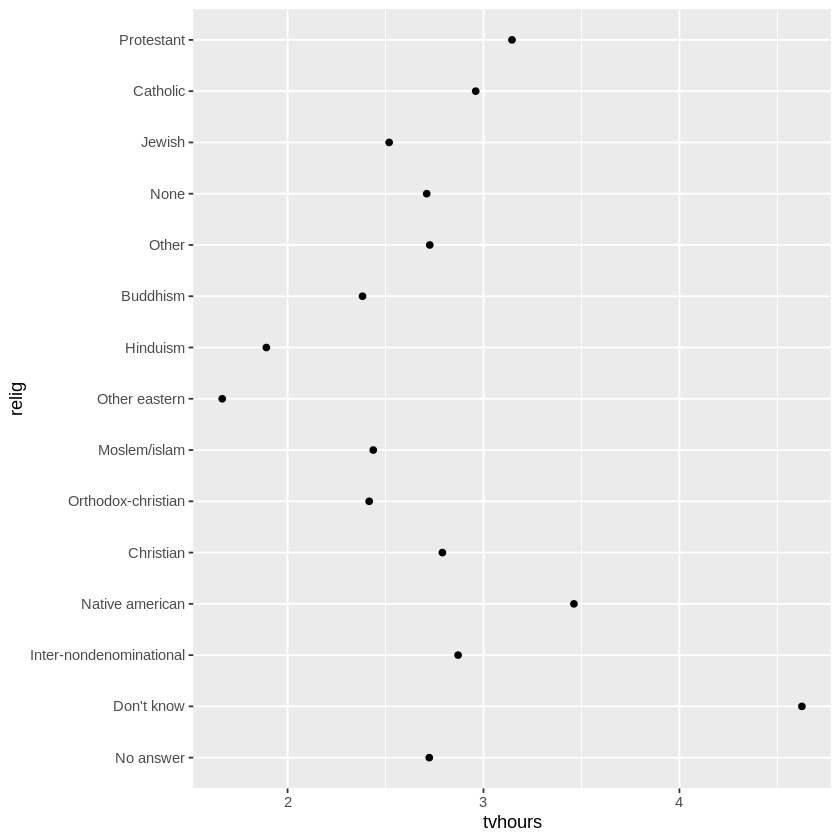

In [16]:
relig <- gss_cat %>%
  group_by(relig) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  )

ggplot(relig, aes(tvhours, relig)) + geom_point()


It is difficult to interpret this plot because there's no overall pattern. We can improve it by reordering the levels of `relig` using `fct_reorder()`. `fct_reorder()` takes three arguments:

* `f`, the factor whose levels you want to modify.
* `x`, a numeric vector that you want to use to reorder the levels.
* Optionally, `fun`, a function that's used if there are multiple values of
  `x` for each value of `f`. The default value is `median`.


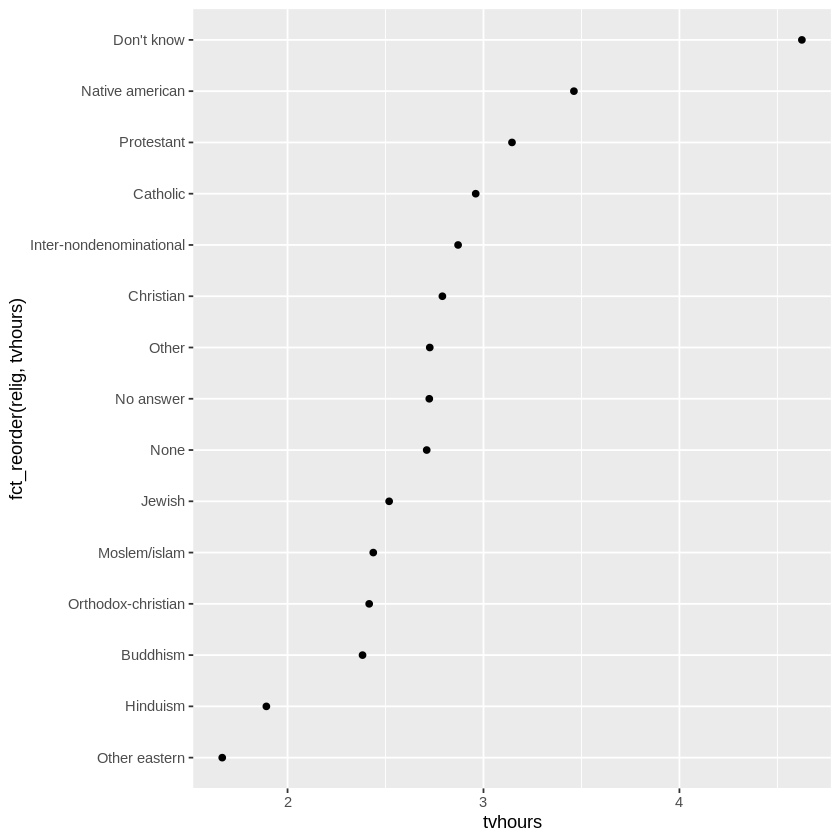

In [17]:
ggplot(relig, aes(tvhours, fct_reorder(relig, tvhours))) +
  geom_point()


Reordering religion makes it much easier to see that people in the "Don't know" category watch much more TV, and Hinduism & Other Eastern religions watch much less.

As you start making more complicated transformations, I'd recommend moving them out of `aes()` and into a separate `mutate()` step. For example, you could rewrite the plot above as:


```r
relig %>%
  mutate(relig = fct_reorder(relig, tvhours)) %>%
  ggplot(aes(tvhours, relig)) +
    geom_point()
```


What if we create a similar plot looking at how average age varies across reported income level?



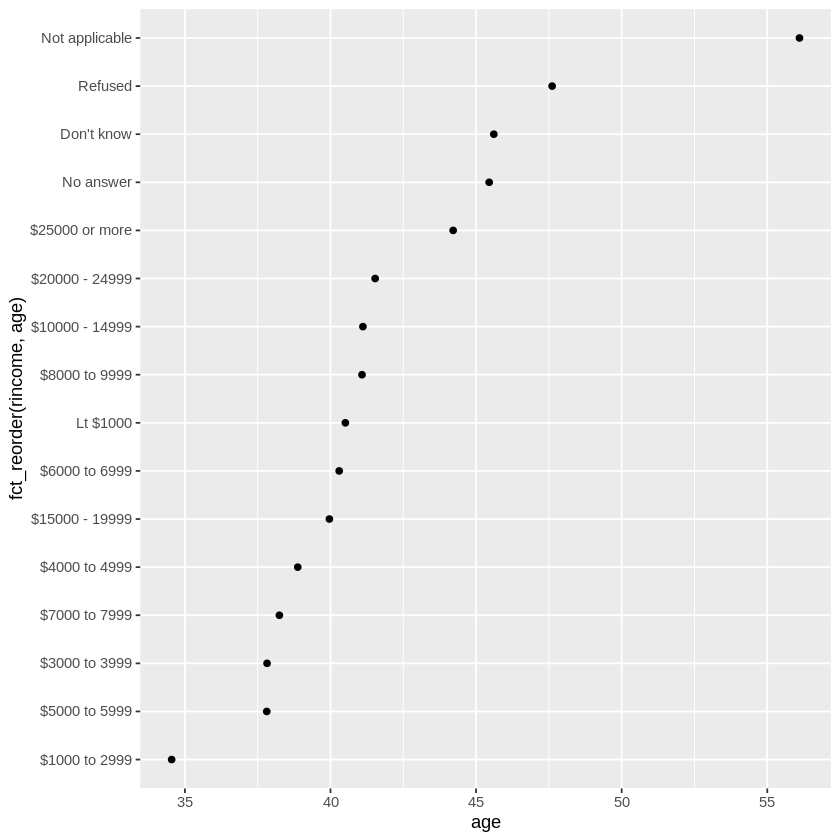

In [19]:
rincome <- gss_cat %>%
  group_by(rincome) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  )

ggplot(rincome, aes(age, fct_reorder(rincome, age))) + geom_point()



Here, arbitrarily reordering the levels isn't a good idea! That's because `rincome` already has a principled order that we shouldn't mess with. Reserve `fct_reorder()` for factors whose levels are arbitrarily ordered.

However, it does make sense to pull "Not applicable" to the front with the other special levels. You can use `fct_relevel()`. It takes a factor, `f`, and then any number of levels that you want to move to the front of the line.



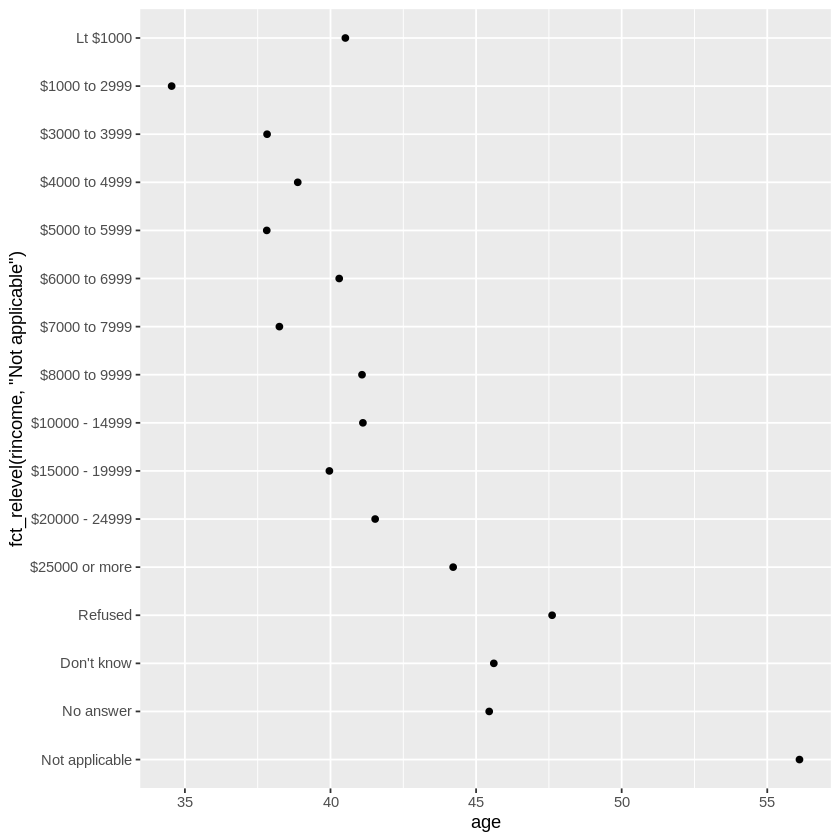

In [20]:
ggplot(rincome, aes(age, fct_relevel(rincome, "Not applicable"))) +
  geom_point()


Why do you think the average age for "Not applicable" is so high?

Another type of reordering is useful when you are colouring the lines on a plot. `fct_reorder2()` reorders the factor by the `y` values associated with the largest `x` values. This makes the plot easier to read because the line colours line up with the legend.




```r
by_age <- gss_cat %>%
  filter(!is.na(age)) %>%
  group_by(age, marital) %>%
  count() %>%
  mutate(prop = n / sum(n))

ggplot(by_age, aes(age, prop, colour = marital)) +
  geom_line(na.rm = TRUE)

ggplot(by_age, aes(age, prop, colour = fct_reorder2(marital, age, prop))) +
  geom_line() +
  labs(colour = "marital")
```
<img src="https://d33wubrfki0l68.cloudfront.net/93b89f47f63a78119b28d98c480c129d8f9dfa44/eb977/factors_files/figure-html/unnamed-chunk-20-1.png" alt="img R" 
     width="450" height="300"  align="left" >

<img src="https://d33wubrfki0l68.cloudfront.net/edee46303b7c4583cf3d88bbeed9b80b5be5205c/99348/factors_files/figure-html/unnamed-chunk-20-2.png" alt="img R" 
     width="450" height="300"  align="left" >


Finally, for bar plots, you can use `fct_infreq()` to order levels in increasing frequency: this is the simplest type of reordering because it doesn't need any extra variables. You may want to combine with `fct_rev()`.



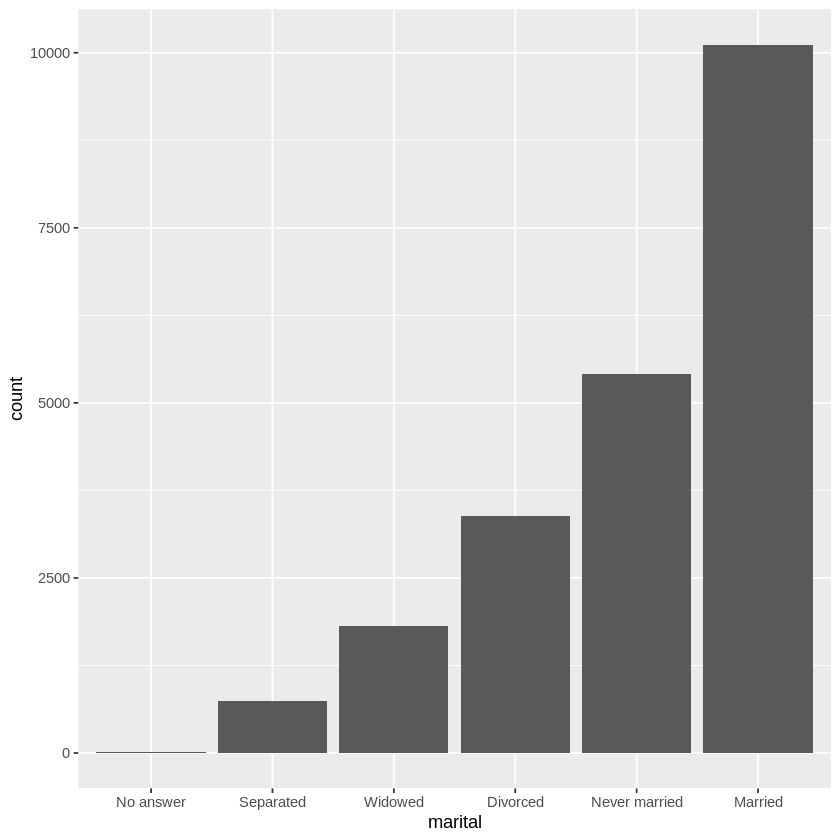

In [21]:
gss_cat %>%
  mutate(marital = marital %>% fct_infreq() %>% fct_rev()) %>%
  ggplot(aes(marital)) +
    geom_bar()


### Exercises

1.  There are some suspiciously high numbers in `tvhours`. Is the mean a good
    summary?

1.  For each factor in `gss_cat` identify whether the order of the levels is
    arbitrary or principled.

1.  Why did moving "Not applicable" to the front of the levels move it to the
    bottom of the plot?

## Modifying factor levels

More powerful than changing the orders of the levels is changing their values. This allows you to clarify labels for publication, and collapse levels for high-level displays. The most general and powerful tool is `fct_recode()`. It allows you to recode, or change, the value of each level. For example, take the `gss_cat$partyid`:



In [22]:
gss_cat %>% count(partyid)

partyid,n
<fct>,<int>
No answer,154
Don't know,1
Other party,393
Strong republican,2314
Not str republican,3032
"Ind,near rep",1791
Independent,4119
"Ind,near dem",2499
Not str democrat,3690



The levels are terse and inconsistent. Let's tweak them to be longer and use a parallel construction.


In [23]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican, strong"    = "Strong republican",
    "Republican, weak"      = "Not str republican",
    "Independent, near rep" = "Ind,near rep",
    "Independent, near dem" = "Ind,near dem",
    "Democrat, weak"        = "Not str democrat",
    "Democrat, strong"      = "Strong democrat"
  )) %>%
  count(partyid)

partyid,n
<fct>,<int>
No answer,154
Don't know,1
Other party,393
"Republican, strong",2314
"Republican, weak",3032
"Independent, near rep",1791
Independent,4119
"Independent, near dem",2499
"Democrat, weak",3690



`fct_recode()` will leave levels that aren't explicitly mentioned as is, and will warn you if you accidentally refer to a level that doesn't exist.

To combine groups, you can assign multiple old levels to the same new level:


In [24]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican, strong"    = "Strong republican",
    "Republican, weak"      = "Not str republican",
    "Independent, near rep" = "Ind,near rep",
    "Independent, near dem" = "Ind,near dem",
    "Democrat, weak"        = "Not str democrat",
    "Democrat, strong"      = "Strong democrat",
    "Other"                 = "No answer",
    "Other"                 = "Don't know",
    "Other"                 = "Other party"
  )) %>%
  count(partyid)

partyid,n
<fct>,<int>
Other,548
"Republican, strong",2314
"Republican, weak",3032
"Independent, near rep",1791
Independent,4119
"Independent, near dem",2499
"Democrat, weak",3690
"Democrat, strong",3490



You must use this technique with care: if you group together categories that are truly different you will end up with misleading results.

If you want to collapse a lot of levels, `fct_collapse()` is a useful variant of `fct_recode()`. For each new variable, you can provide a vector of old levels:


In [25]:
gss_cat %>%
  mutate(partyid = fct_collapse(partyid,
    other = c("No answer", "Don't know", "Other party"),
    rep = c("Strong republican", "Not str republican"),
    ind = c("Ind,near rep", "Independent", "Ind,near dem"),
    dem = c("Not str democrat", "Strong democrat")
  )) %>%
  count(partyid)

partyid,n
<fct>,<int>
other,548
rep,5346
ind,8409
dem,7180



Sometimes you just want to lump together all the small groups to make a plot or table simpler. That's the job of `fct_lump()`:


In [26]:
gss_cat %>%
  mutate(relig = fct_lump(relig)) %>%
  count(relig)

relig,n
<fct>,<int>
Protestant,10846
Other,10637



The default behaviour is to progressively lump together the smallest groups, ensuring that the aggregate is still the smallest group. In this case it's not very helpful: it is true that the majority of Americans in this survey are Protestant, but we've probably over collapsed.

Instead, we can use the `n` parameter to specify how many groups (excluding other) we want to keep:


In [27]:
gss_cat %>%
  mutate(relig = fct_lump(relig, n = 10)) %>%
  count(relig, sort = TRUE) %>%
  print(n = Inf)

# A tibble: 10 × 2
   relig                       n
   <fct>                   <int>
 1 Protestant              10846
 2 Catholic                 5124
 3 None                     3523
 4 Christian                 689
 5 Other                     458
 6 Jewish                    388
 7 Buddhism                  147
 8 Inter-nondenominational   109
 9 Moslem/islam              104
10 Orthodox-christian         95



### Exercises

1.  How have the proportions of people identifying as Democrat, Republican, and
    Independent changed over time?

1.  How could you collapse `rincome` into a small set of categories?
